In [2]:
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import math
import pandas as pd

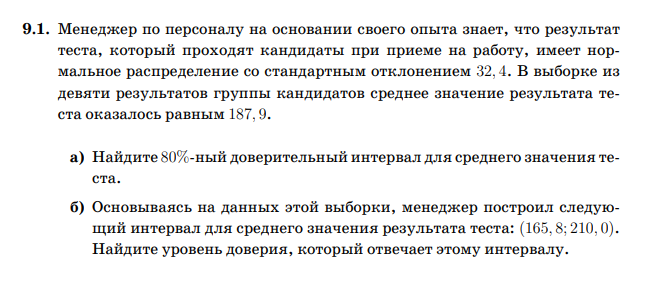

In [177]:
#1a
x_mean = 187.9
x_std = 32.4
n = 9
gamma = 0.8
alpha = 0.2
z = norm(0,1).isf(alpha/2)
upper_border = x_mean + z * x_std / n**(1/2)
lower_border = x_mean - z * x_std / n**(1/2)
print(lower_border, upper_border)

174.05924309211832 201.7407569078817


In [178]:
#b
z = sp.Symbol('z')
x_mean = 187.9
x_std = 32.4
n = 9
upper_border = 210
lower_border = 165.8
z1 = sp.solve((x_mean + z * x_std / n**(1/2)) - upper_border, z)[0]
z2 = sp.solve((x_mean - z * x_std / n**(1/2)) - lower_border, z)[0]
gamma = 1 -norm(0,1).sf(float(z1)) * 2
print(gamma)

0.9592727721142793


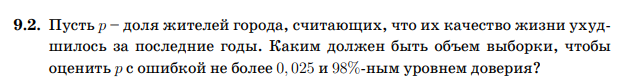

In [179]:
#2
p, n = sp.symbols('p, n')
gamma = 0.98
alpha = 1 - gamma
std = (p*(1-p))**0.5
z = norm(0,1).isf(alpha/2)
exp = (z * (p*(1-p)/n)**0.5 - 0.025)
sp.solve(exp, n)[0]

8659.03108968694*p*(1.0 - p)

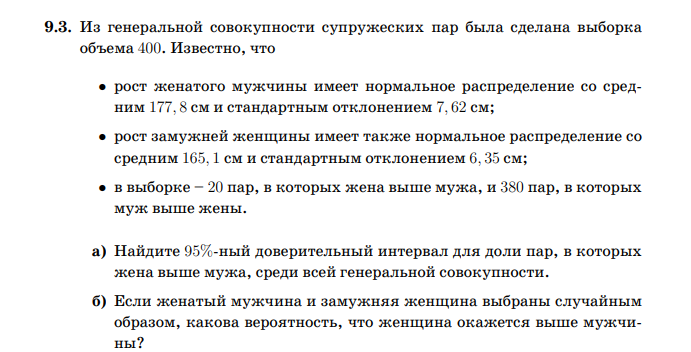

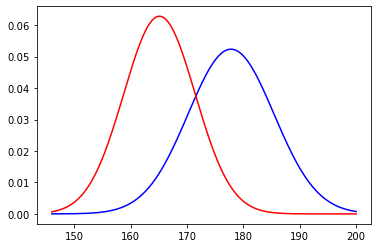

In [180]:
#3
x = np.linspace(146,200, 1000)
plt.plot(x, norm(177.8, 7.62).pdf(x), color = 'b')
plt.plot(x, norm(165.1, 6.35).pdf(x), color = 'r')


In [181]:
alpha = 0.05
z = norm(0,1).isf(alpha/2)
upper_border = 20/400 + z * ((20/400 * 380/400) / 400)**(1/2)
lower_border = 20/400 - z * ((20/400 * 380/400) / 400)**(1/2)
print(lower_border, upper_border)

0.028641787646026474 0.07135821235397354


In [182]:
mean = 165.1 - 177.8
std = (7.62**2 + 6.35**2)**(0.5)
norm(mean, std).sf(0)

0.10020773084642709

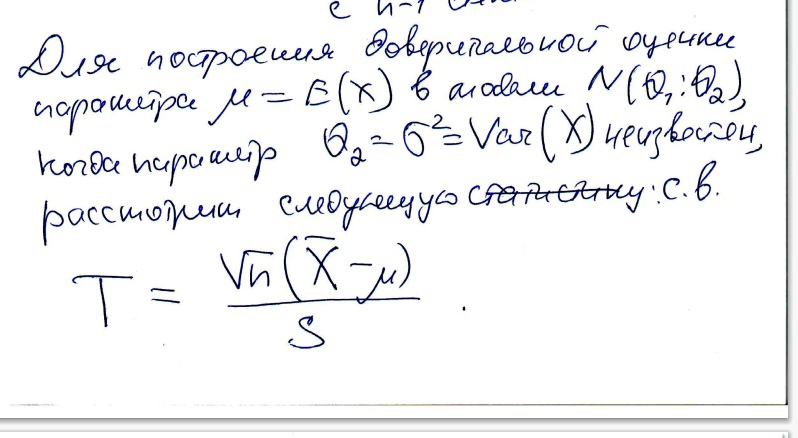

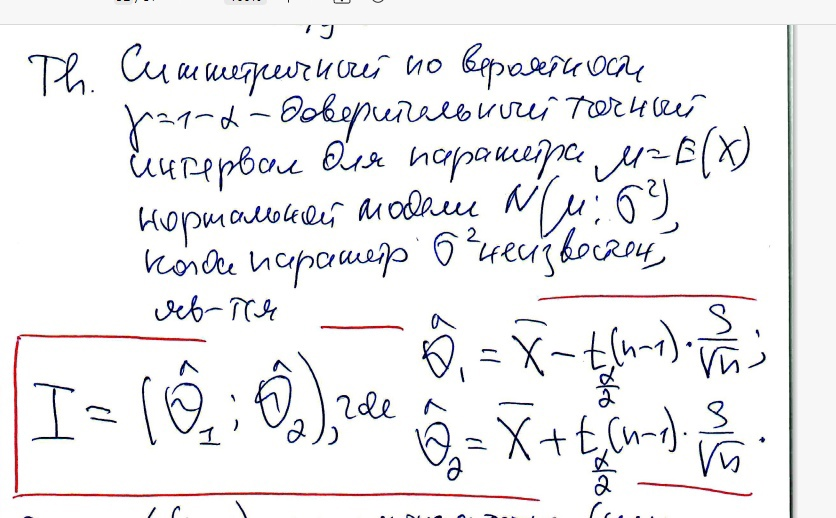

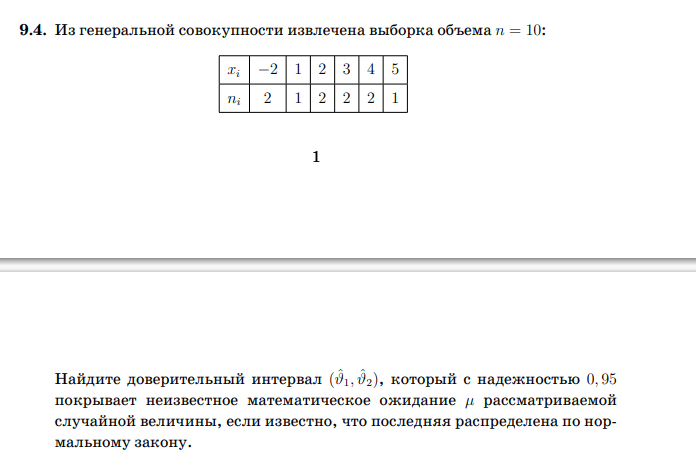

In [183]:
#4
arr = np.array([-2] * 2 + [1] + [2] * 2 + [3] * 2 + [4] * 2 + [5])
arr.size

10

In [184]:
alpha = 0.05
upper_border = arr.mean() + t(arr.size - 1).isf(alpha/2) * (arr.var(ddof = 1)**(1/2))/arr.size**0.5
lower_border = arr.mean() - t(arr.size - 1).isf(alpha/2) * (arr.var(ddof = 1)**(1/2))/arr.size**0.5
print(lower_border, upper_border)

0.2804959968871532 3.7195040031128466


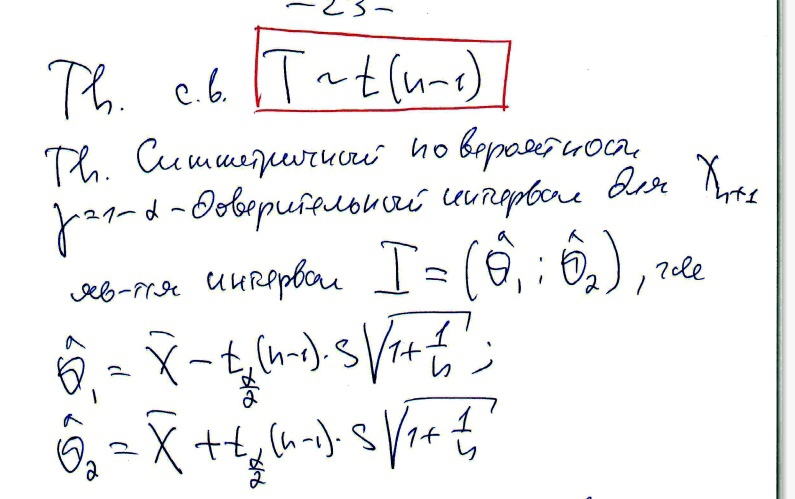

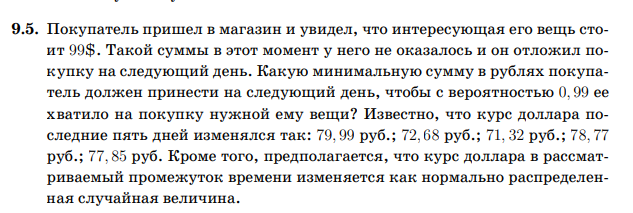

In [4]:
#5
price_doll = 99
alpha = 0.01
arr = np.array([79.99, 72.68, 71.32, 78.77, 77.85])
upper_border = arr.mean() + t(arr.size - 1).isf(alpha/2) * (arr.var(ddof = 1)**(1/2))*(1 + 1/arr.size)**0.5
lower_border = arr.mean() - t(arr.size - 1).isf(alpha/2) * (arr.var(ddof = 1)**(1/2))*(1 + 1/arr.size)**0.5
print(lower_border, upper_border, upper_border * price_doll)
ans = upper_border * price_doll
print(f'надо взять {ans}')

56.61032394970067 95.63367605029933 9467.733928979633
надо взять 9467.733928979633


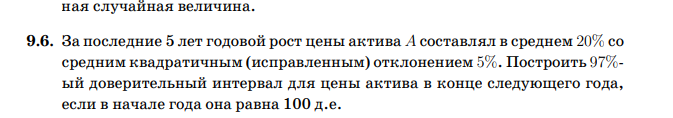

In [186]:
#6
n = 5
price = 100
mean = 0.2
s = 0.05
alpha = 0.03
upper_border = mean + t(n - 1).isf(alpha/2) * s * (1 + 1/n)**0.5
lower_border = mean - t(n - 1).isf(alpha/2) * s * (1 + 1/n)**0.5
print((1 + lower_border) * price, (1 + upper_border) * price)

101.93813811734542 138.06186188265457


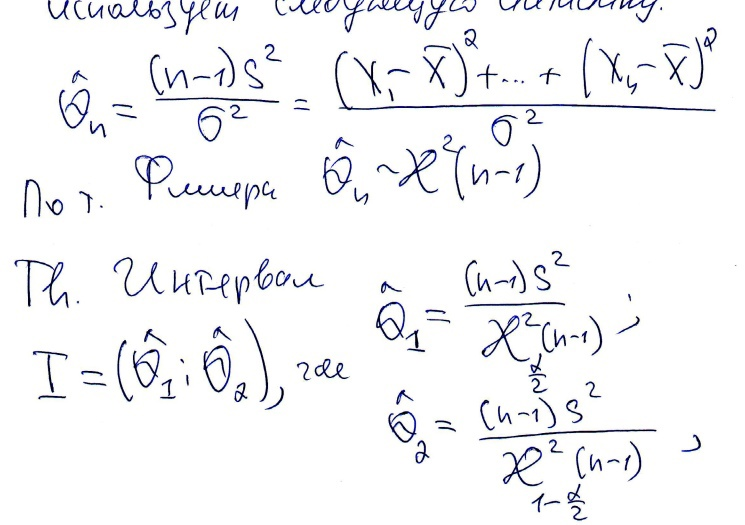

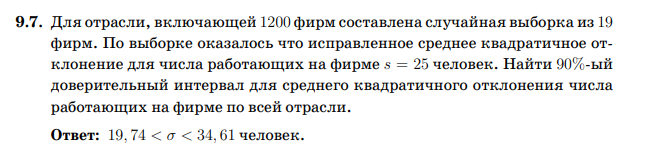

In [187]:
#7
N = 1200
n = 19
s = 25
alpha = 0.1
upper_border = ((n-1) * s**2)/ chi2(n-1).isf(1 - alpha/2)
lower_border = ((n-1) * s**2)/ chi2(n-1).isf(alpha/2)
print(lower_border**0.5, upper_border**0.5)

19.740499552627163 34.61249782279546


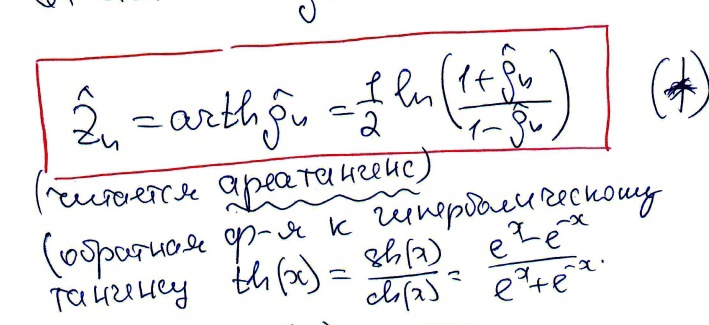

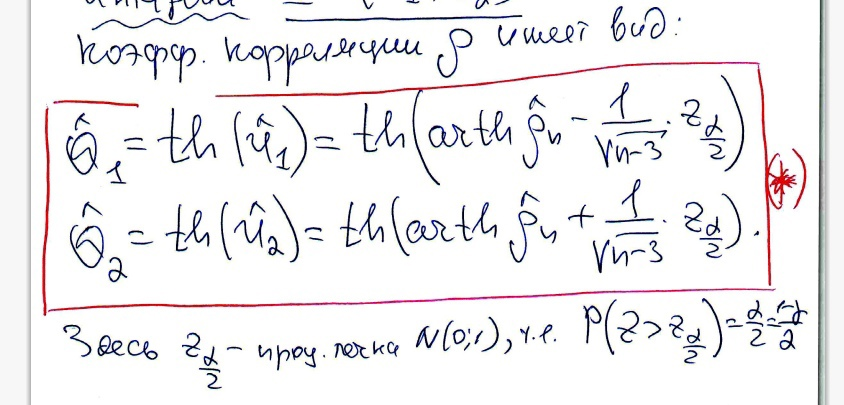

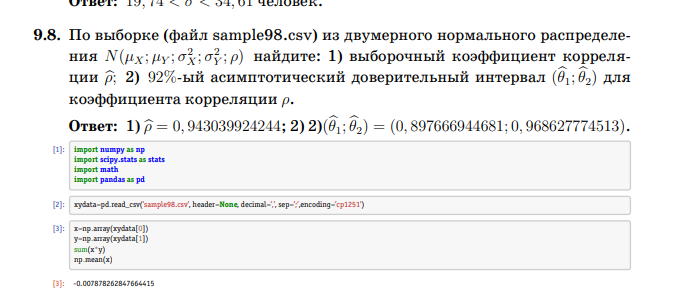

In [188]:
xydata = pd.read_csv('sample98.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [189]:
x = np.array(xydata[0])
y = np.array(xydata[1])
alpha = 0.08
x_mean = x.mean()
y_mean = y.mean()
corr = sum((x_mean - x) * (y_mean - y)) / ((x.var()**0.5 * y.var()**0.5) * x.size)
corr

0.9430399242709796

In [190]:
lower_border = np.tanh(np.arctanh(corr) - 1/(x.size - 3)**0.5 * norm(0,1).isf(alpha/2))
upper_border = np.tanh(np.arctanh(corr) + 1/(x.size - 3)**0.5 * norm(0,1).isf(alpha/2))
print(lower_border, upper_border)

0.8976669447274581 0.9686277745278847


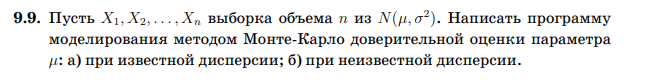

In [208]:
#9a
data = norm(loc = 2, scale = 0.08).rvs(size = 100000)

In [209]:
sample_means = []
intervals = []
b1 = []
t1 = []
c1 = []
sample_size = 1000
alpha = 0.1
z = norm(0,1).isf(alpha/2)
std = data.std()
n = 50

In [210]:
for i in range(n):
    sample = np.random.choice(data, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    delta = z * std / sample_size**0.5
    confidence_int = (sample_mean - delta, sample_mean + delta)
    intervals.append(confidence_int)
for bot,top in intervals:
    b1.append(bot)
    t1.append(top)
    c1.append((top - bot)/2)

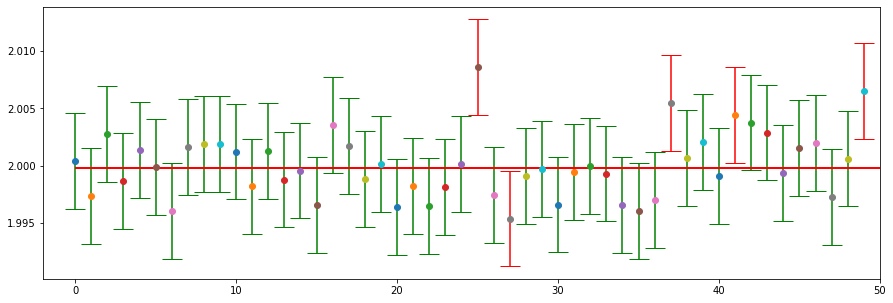

In [211]:
fig,ax =plt.subplots(figsize=(15, 5))


plt.xlim(-2,50)

k=0
m=0
for i in range(len(intervals)):
    if b1[i] < np.mean(data)<t1[i]:
        plt.errorbar(x=i, y=sample_means[i], yerr=c1[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_means[i], yerr=c1[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=np.mean(data), linewidth=2.0,color="red");

In [212]:
#9b

In [196]:
data = norm(loc = 2, scale = 0.08).rvs(size = 100000)
sample_means = []
intervals = []
b2 = []
t2 = []
c2 = []
sample_size = 1000
alpha = 0.1
t = t(sample_size - 1).isf(alpha/2)
std = data.std()
n = 50
for i in range(n):
    sample = np.random.choice(data, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    delta = t * (sample.var(ddof = 1)**(1/2))/sample_size**0.5
    confidence_int = (sample_mean - delta, sample_mean + delta)
    intervals.append(confidence_int)
for bot,top in intervals:
    b2.append(bot)
    t2.append(top)
    c2.append((top - bot)/2)

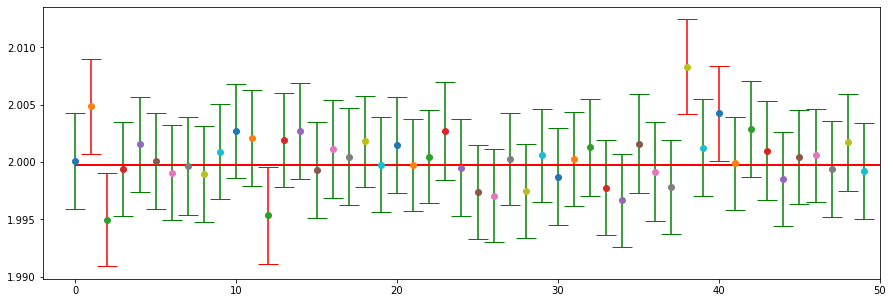

In [197]:
fig,ax =plt.subplots(figsize=(15, 5))


plt.xlim(-2,50)

k=0
m=0
for i in range(len(intervals)):
    if b2[i] < np.mean(data)<t2[i]:
        plt.errorbar(x=i, y=sample_means[i], yerr=c2[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_means[i], yerr=c2[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=np.mean(data), linewidth=2.0,color="red");

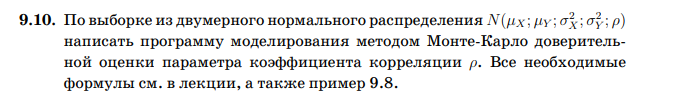

In [273]:
cov = np.array([[1, 1/2], [1/2, 1]])
mean = np.array([2, 3])
X = multivariate_normal(cov = cov, mean = mean)
data = X.rvs(size = 100000)
sample_size = 1000
alpha = 0.1
data = list(data)
s1 = pd.Series(data = data)
x_data = np.array([])
y_data = np.array([])
for i in range(s1.size):
    x_data = np.append(x_data, s1[i][0])
    y_data = np.append(y_data, s1[i][1])
x_data_mean = x_data.mean()
y_data_mean = y_data.mean()
corr_data = sum((x_data_mean - x_data) * (y_data_mean - y_data)) / ((x_data.var()**0.5 * y_data.var()**0.5) * x_data.size)

In [274]:
intervals = []
sample_corr = []
b = []
t = []
c = []
n = 50
for i in range(n):
    
    sample = s1.sample(n = sample_size, replace = False).values
    x = np.array([])
    y = np.array([])
    for i in range(sample_size):
        x = np.append(x, sample[i][0])
        y = np.append(y, sample[i][1])
    x_mean = x.mean()
    y_mean = y.mean()
    corr = sum((x_mean - x) * (y_mean - y)) / ((x.var()**0.5 * y.var()**0.5) * x.size)
    sample_corr.append(corr)
    lower_border = np.tanh(np.arctanh(corr) - 1/(x.size - 3)**0.5 * norm(0,1).isf(alpha/2))
    upper_border = np.tanh(np.arctanh(corr) + 1/(x.size - 3)**0.5 * norm(0,1).isf(alpha/2))
    confidence_int = (lower_border, upper_border)
    intervals.append(confidence_int)
for bot,top in intervals:
    b.append(bot)
    t.append(top)
    c.append((top - bot)/2)

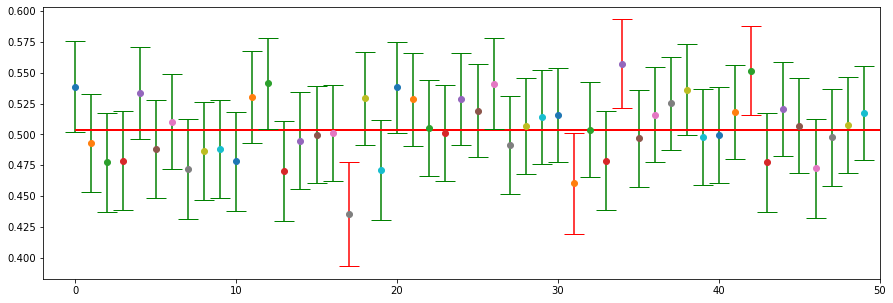

In [276]:
fig,ax =plt.subplots(figsize=(15, 5))


plt.xlim(-2,50)

k=0
m=0
for i in range(len(intervals)):
    if b[i] < corr_data<t[i]:
        plt.errorbar(x=i, y=sample_corr[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_corr[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=corr_data, linewidth=2.0,color="red");